In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
#Original dataset

df=pd.read_csv(r'/Users/reshma/Desktop/Reshma/SimpliLearn_Certificate_mac/Final Projects/rolling_stones_spotify.csv')


# TO GET THE CLEAR VIEW OF ALL THE COLUMNS IN THE DATAFRAME
pd.set_option('display.max_columns', None) 


# TO GET THE CLEAR VIEW OF ALL THE ROWS IN THE DATAFRAME
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [5]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [6]:
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [7]:
# creating a copy to work on and keeping the original data intact

df1=df.copy()
df1.head(2)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173


In [8]:
df1['release_date']=pd.to_datetime(df1['release_date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [9]:
 #Checking original shape of the data
df1.shape

(1610, 18)

In [10]:
# Checking for duplicate data : Conclusion : no duplicate data

df1.drop_duplicates().shape

(1610, 18)

In [11]:
df1['Unnamed: 0'].value_counts().head(2)

0       1
1069    1
Name: Unnamed: 0, dtype: int64

In [12]:
# MANIPULATING THE DATE COLUMN >> INTO YEAR, MONTH, MONTH NAME, DAY NAME, MONTH NUMBER, DAY NUMBER
# Checking Irrelevant Entries: Dropped 'Unnamed: 0'

df1['Year'] = df1['release_date'].dt.year # for the Year number
df1['Month'] = df1['release_date'].dt.month # for the month name
df1['Day'] = df1['release_date'].dt.day # for the Day number in a month
df1['Weekday']=df1['release_date'].dt.day_name() # for the Name of the day
df1['month_name']=df1['release_date'].dt.strftime('%B') # for the month name
df1['Week number']=df1['release_date'].dt.isocalendar().week
df1.drop('Unnamed: 0', axis=1,inplace=True) # dropped the unnecessary column
df1.head(2) # checking the result >> successful

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Year,Month,Day,Weekday,month_name,Week number
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022,6,10,Friday,June,23
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022,6,10,Friday,June,23


In [13]:
df1.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Year,Month,Day,Weekday,month_name,Week number
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022,6,10,Friday,June,23
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022,6,10,Friday,June,23
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2022,6,10,Friday,June,23
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2022,6,10,Friday,June,23
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2022,6,10,Friday,June,23


In [14]:
df1.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'Year', 'Month', 'Day', 'Weekday', 'month_name',
       'Week number'],
      dtype='object')

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

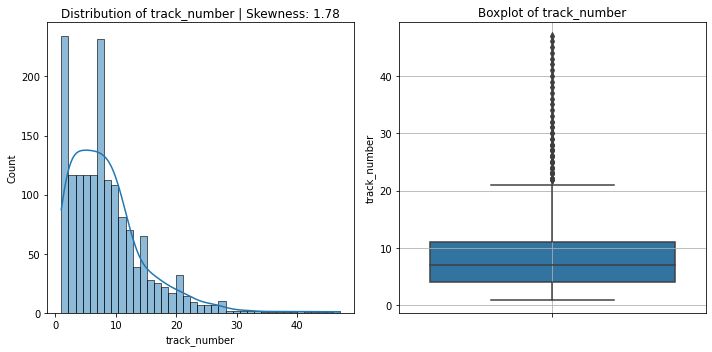

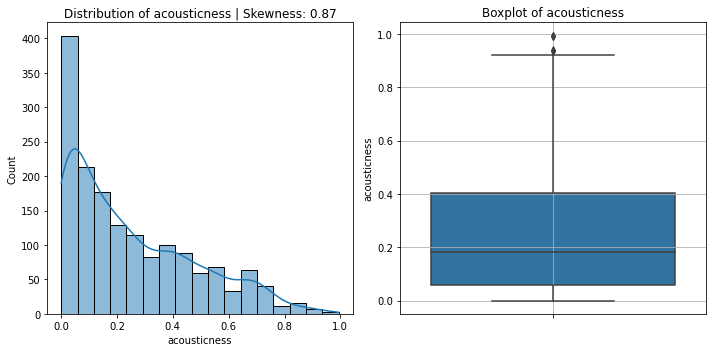

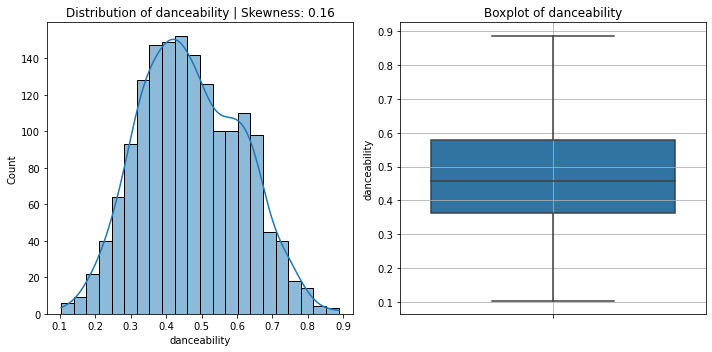

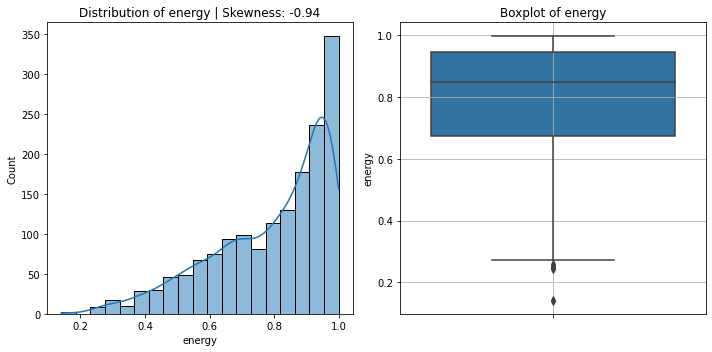

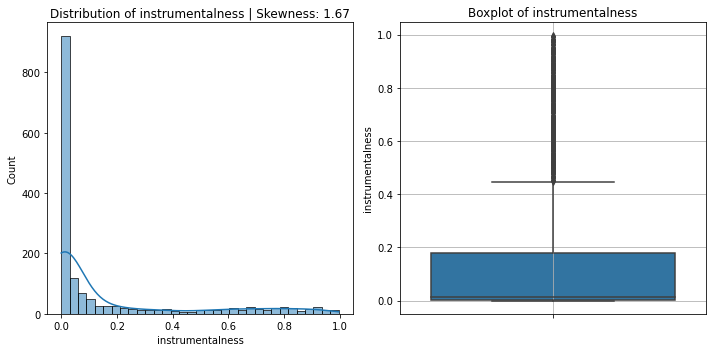

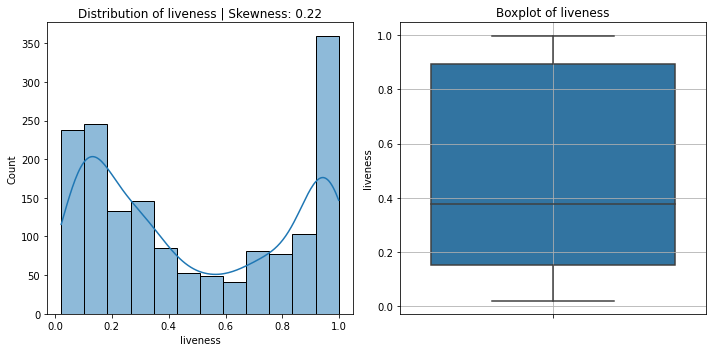

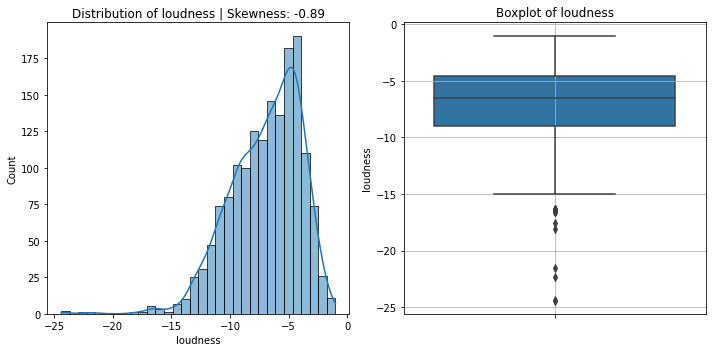

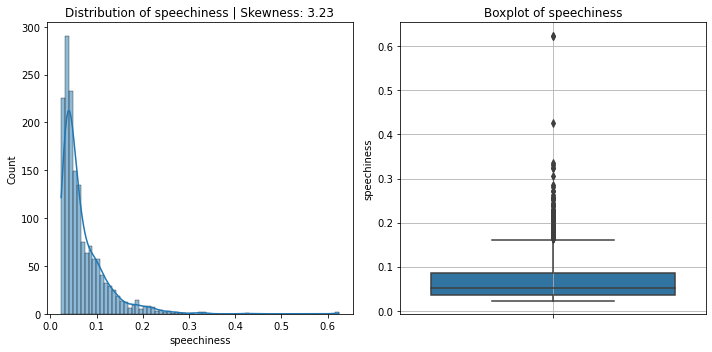

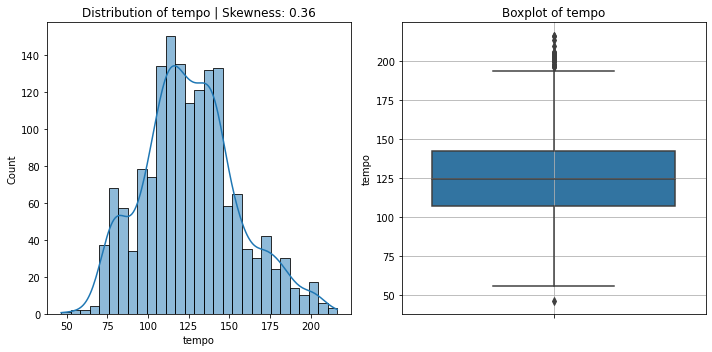

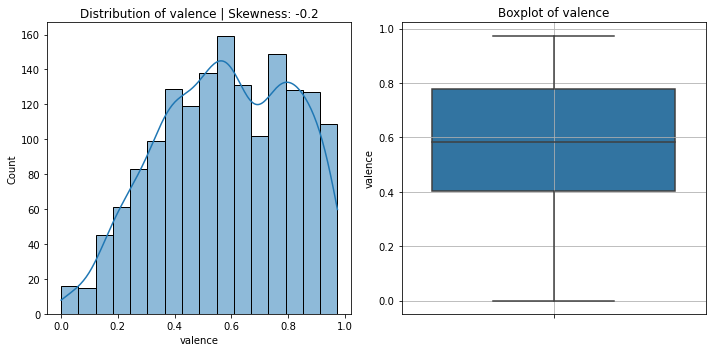

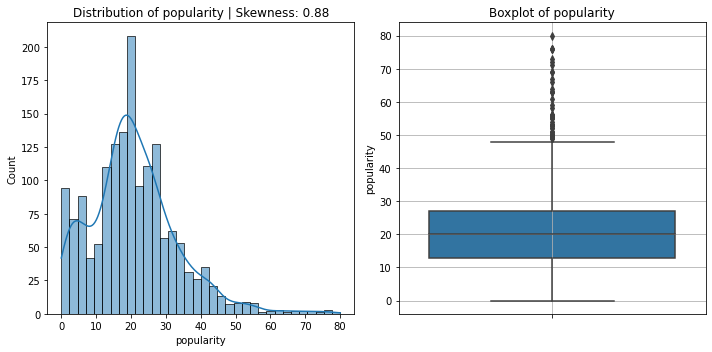

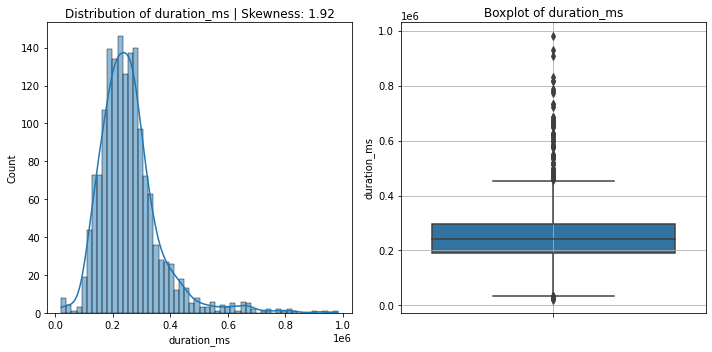

In [16]:
# Numerical Features

# acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms



numerical_features = ['track_number','acousticness', 'danceability', 'energy', 'instrumentalness','liveness', 'loudness', 
                      'speechiness', 'tempo', 'valence','popularity', 'duration_ms']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df1[feature], kde=True)
  #  plt.title(f'Distribution of {feature}')
    plt.title(f"Distribution of {feature} | Skewness: {round(df[feature].skew(), 2)}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[feature])
    plt.title(f'Boxplot of {feature}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()




#**Explanation:**

#* For each numerical feature, we create two plots:
#    * `histplot`: Shows the distribution of the data, including a kernel density estimate (KDE) to visualize the shape of the distribution.
#    * `boxplot`: Helps identify outliers and visualize the quartiles of the data.


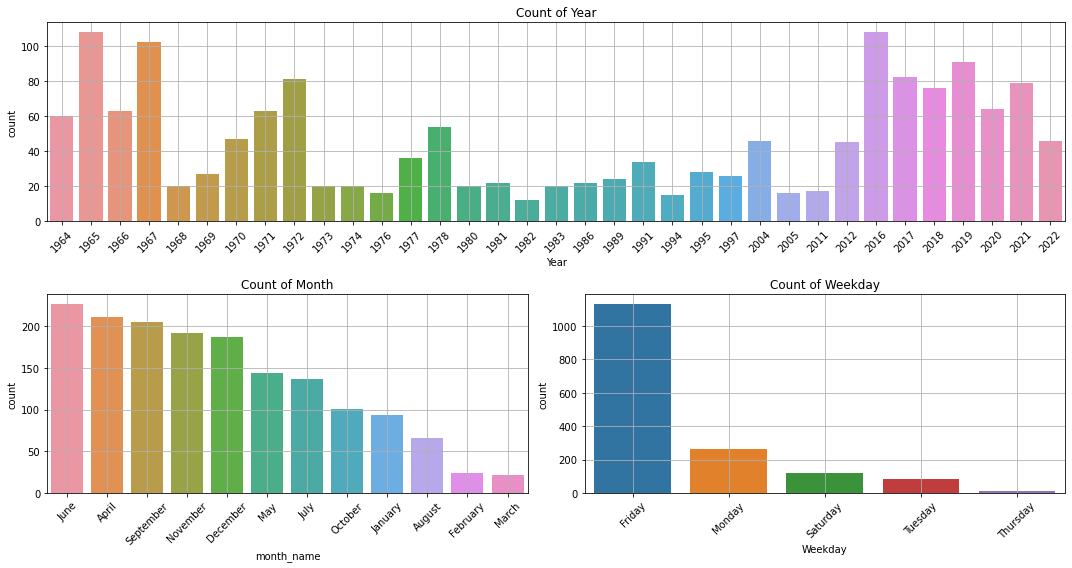

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is already loaded as df1

features = ['Year', 'month_name', 'Weekday']

plt.figure(figsize=(15, 8))

# Plot 'Year' at the top (lowest to highest)
plt.subplot(2, 1, 1)
sns.countplot(x='Year', data=df1, order=sorted(df1['Year'].unique())) #sort the unique values
plt.grid(True)
plt.title('Count of Year')
plt.xticks(rotation=45)

# Plot 'Month' and 'Weekday' at the bottom
plt.subplot(2, 2, 3)
sns.countplot(x='month_name', data=df1, order=df1['month_name'].value_counts().index)
plt.grid(True)
plt.title('Count of Month')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='Weekday', data=df1, order=df1['Weekday'].value_counts().index)
plt.title('Count of Weekday')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

# Bivariate Analysis:

In [19]:
df1.head(2)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Year,Month,Day,Weekday,month_name,Week number
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022,6,10,Friday,June,23
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022,6,10,Friday,June,23


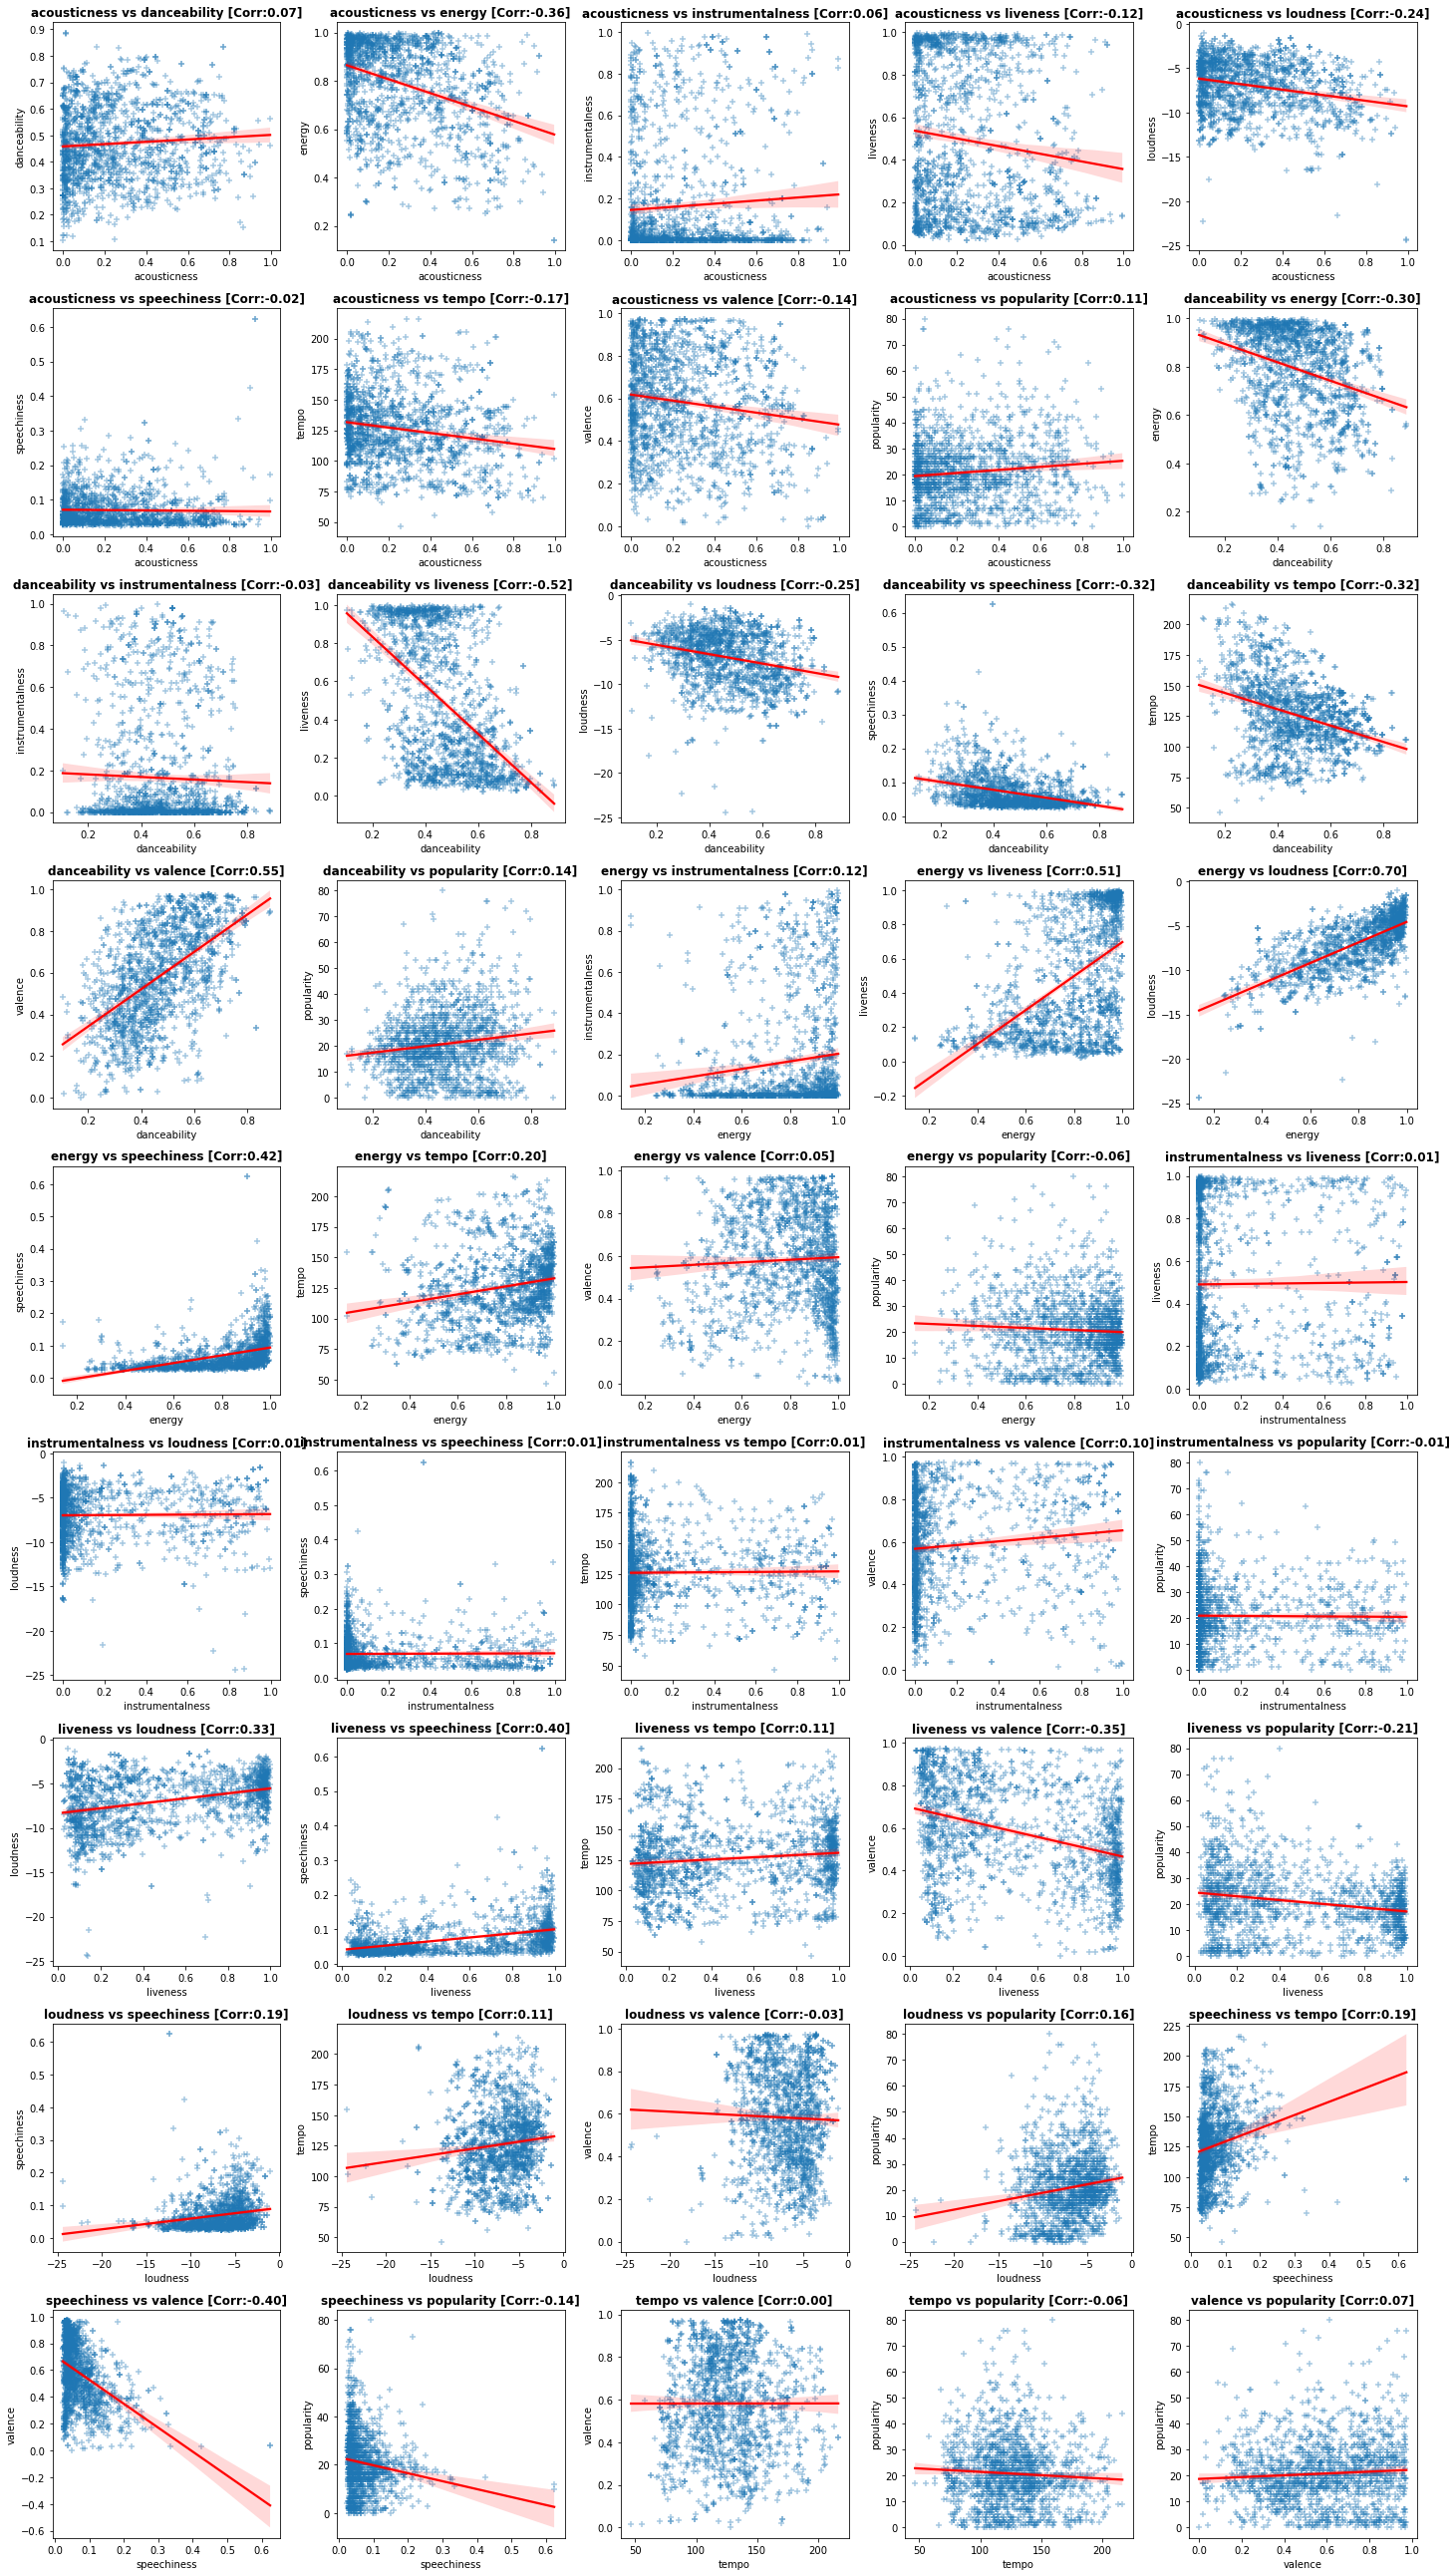

In [20]:
import math

numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

num_pairs = len(numerical_features) * (len(numerical_features) - 1) // 2  # Calculate number of pairs
num_cols = 5  # Adjust as needed
num_rows = math.ceil(num_pairs / num_cols)

plt.figure(figsize=(20, num_rows * 4))  # Adjust figure size as needed

plot_number = 1

# Iterate through pairs of numerical features
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        x_feature = numerical_features[i]
        y_feature = numerical_features[j]

        # Calculate correlation coefficient
        correlation = np.corrcoef(df1[x_feature], df1[y_feature])[0, 1]

        # Create a subplot for each pair
        plt.subplot(num_rows, num_cols, plot_number)
        sns.regplot(x=x_feature, y=y_feature, data=df1, ci=99, marker='+', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.4})
        plt.title(f'{x_feature} vs {y_feature} [Corr:{correlation:.2f}]', fontdict={'fontweight': 'bold', 'fontsize': 12})
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plot_number += 1

plt.tight_layout()
plt.show()

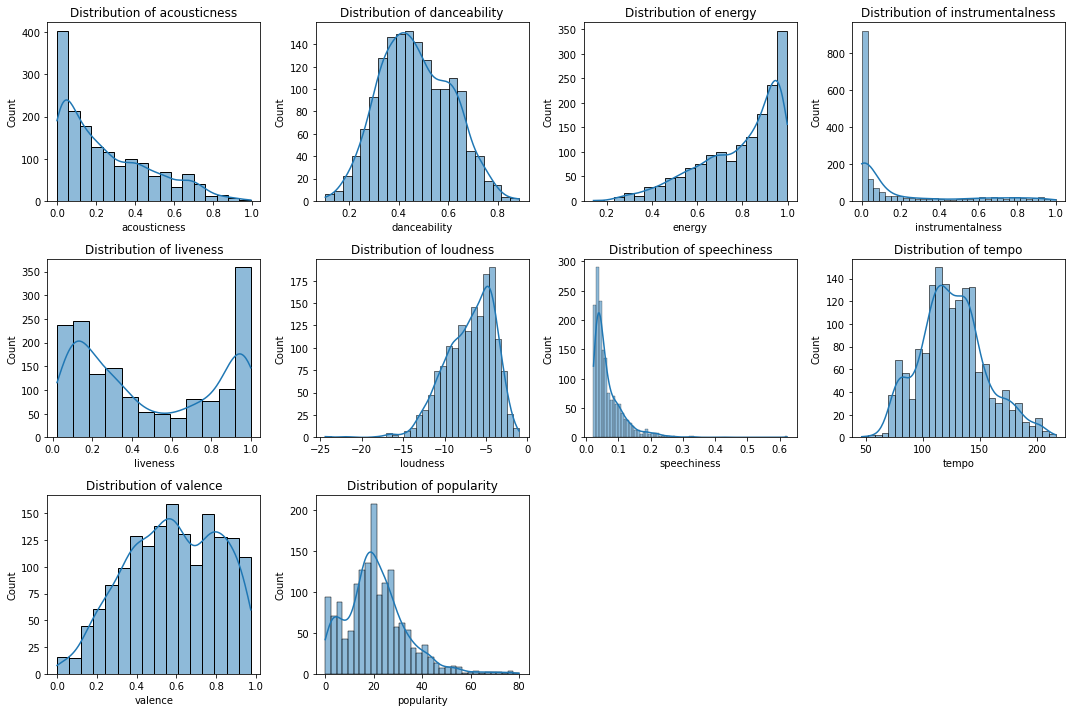

In [21]:


numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)  # Create subplots (3 rows, 4 columns)
    sns.histplot(df1[feature], kde=True)  # Use histplot for histograms with KDE
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# MULTIVARIATE ANALYSIS : 

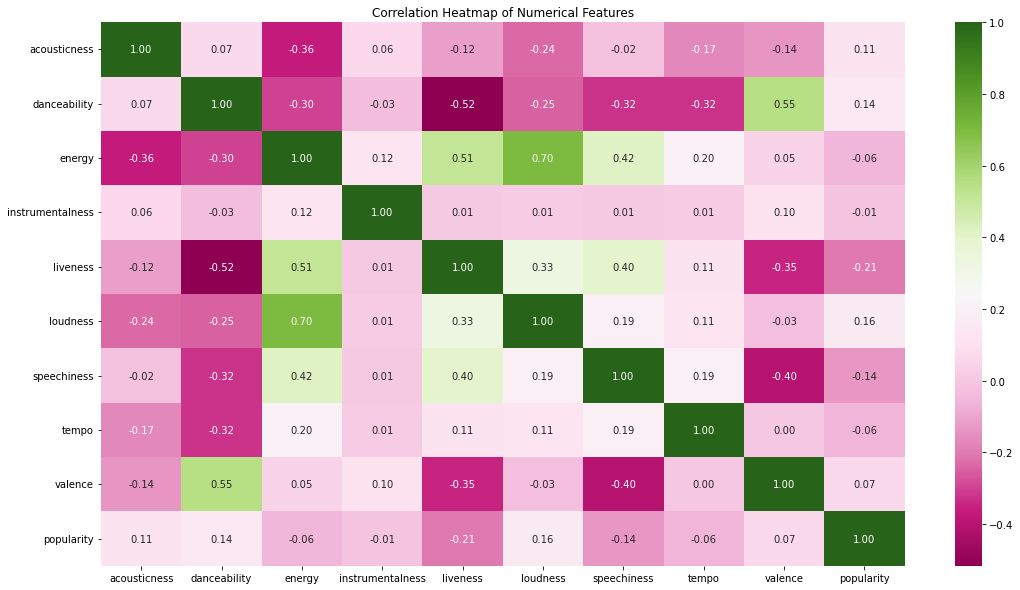

In [22]:
# Create a correlation heatmap

numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

plt.figure(figsize=(18, 10))
correlation_matrix = df1[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
df1.head(2)

# PROBLEM STATEMENT SOLUTION: 

In [23]:
# 1.  Utilize suitable visualizations to identify the two albums that should be recommended 
#.    to anyone based on the number of popular songs in each album


import altair as alt



popularity_threshold = 27  # Adjusted threshold

# Filter songs above the threshold
popular_songs = df1[df1['popularity'] >= popularity_threshold]

# Count songs per album
songs_per_album = popular_songs['album'].value_counts().reset_index()
songs_per_album.columns = ['album', 'song_count']

# Get the top 2 albums
top_2_albums = songs_per_album.head(2)

# Create Altair bar chart
chart = alt.Chart(songs_per_album).mark_bar().encode(
    x='song_count:Q',
    y=alt.Y('album:N', sort='-x'),
    tooltip=['album', 'song_count']
).properties(
    title=f'Albums with Songs Above Popularity Threshold ({popularity_threshold})'
)

text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='song_count:Q'
)

final_chart = (chart + text).configure_axis(
    labelFontSize=10,
    titleFontSize=14
).configure_title(
    fontSize=16
).configure_view(
    strokeWidth=0
).configure_mark(
    opacity=0.8
)

final_chart.show()

# Print top 2 albums to console
print("Top 2 Albums:")
print(top_2_albums)

alt.LayerChart(...)

Top 2 Albums:
                                   album  song_count
0  Exile On Main Street (Deluxe Version)          18
1                          Honk (Deluxe)          18


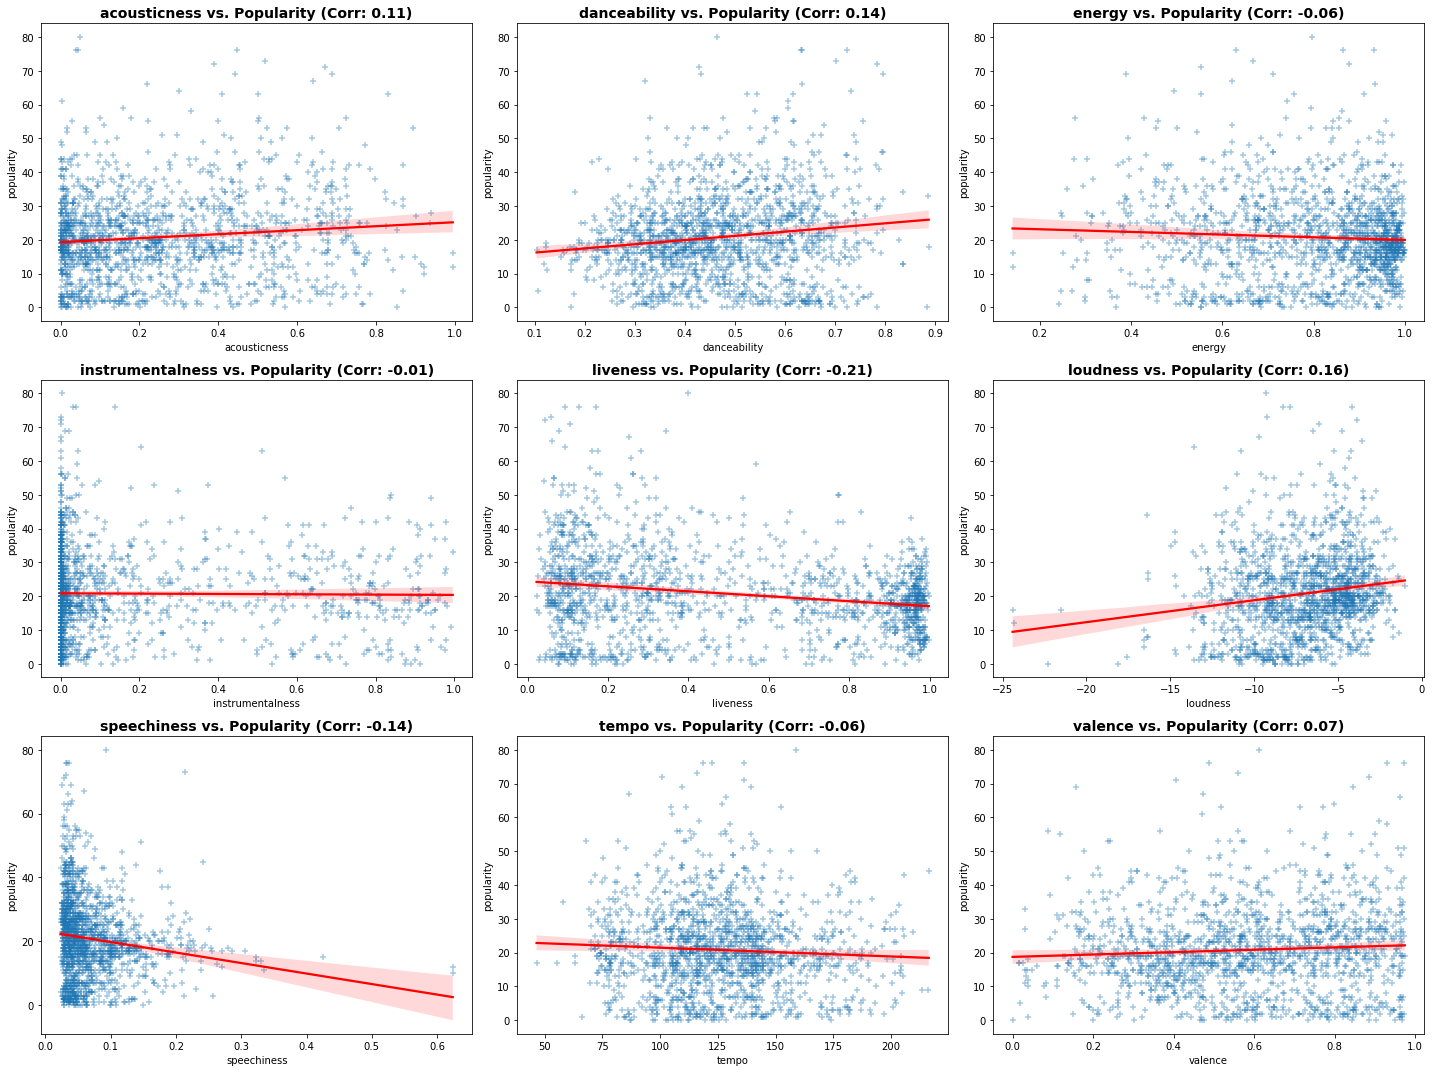

In [24]:
# 3c : Examining the relationship between a song's popularity and various factors, 
#      exploring how this correlation has evolved

numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# 1. Visualize Correlations
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=feature, y='popularity', data=df1, ci=99, marker='+', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.4})
    correlation = np.corrcoef(df1[feature], df1['popularity'])[0, 1]
    plt.title(f'{feature} vs. Popularity (Corr: {correlation:.2f})',fontdict={'fontsize':14,'fontweight':'bold'})
plt.tight_layout()
plt.show()


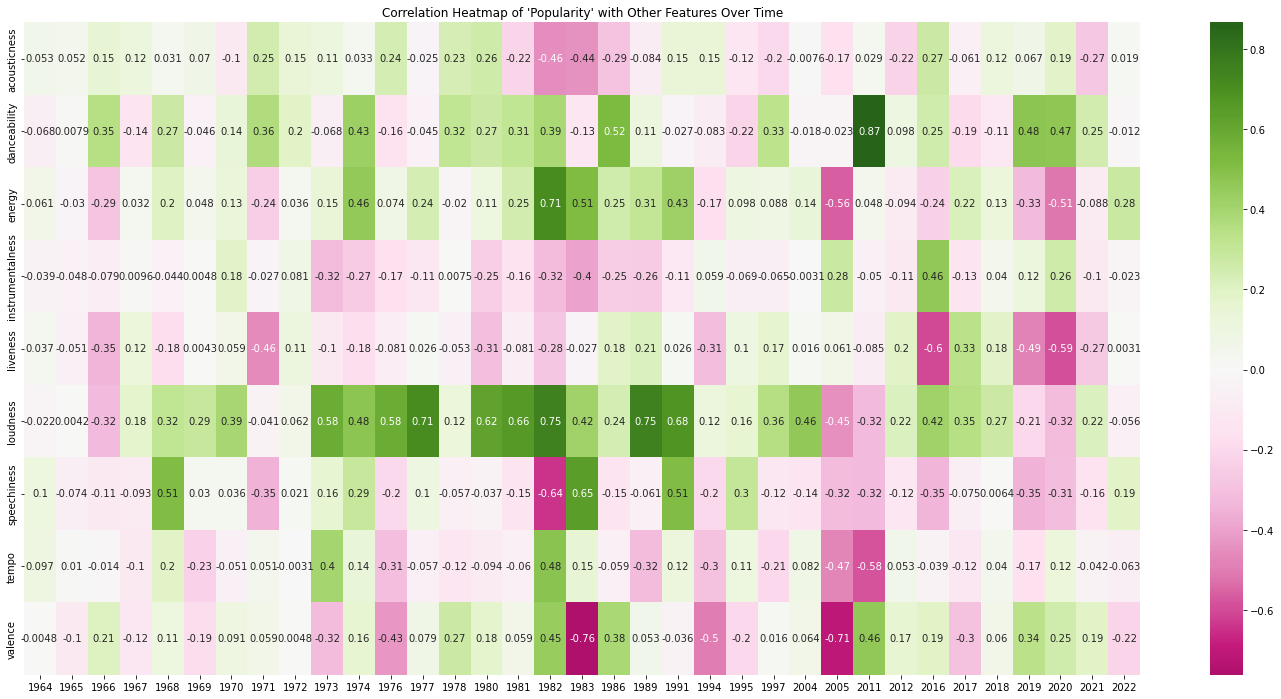

In [50]:
# 3c : Examine the relationship between a song's popularity and various factors, 
#      exploring how this correlation has evolved

numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

years = sorted(df1['Year'].unique())
correlation_matrix = pd.DataFrame(index=numerical_features, columns=years)

for feature in numerical_features:
    for year in years:
        year_data = df1[df1['Year'] == year]
        if not year_data.empty:
            correlation = np.corrcoef(year_data[feature], year_data['popularity'])[0, 1]
            correlation_matrix.loc[feature, year] = correlation

plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='PiYG', center=0)
plt.title("Correlation Heatmap of 'Popularity' with Other Features Over Time")
plt.show()

In [26]:
# OUTLIER TREATMENT:
from scipy import stats


numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

def treat_outliers_zscore(df, column, threshold=3):
    """Treats outliers using Z-score method (capping/flooring)."""
    z_scores = np.abs(stats.zscore(df1[column]))
    outlier_indices = np.where(z_scores > threshold)[0]

    # Calculate mean and std for capping/flooring
    mean = df1[column].mean()
    std = df1[column].std()

    # Calculate upper and lower bounds
    upper_bound = mean + threshold * std
    lower_bound = mean - threshold * std

    # Cap/floor outliers
    df1[column] = np.where(df[column] > upper_bound, upper_bound, df1[column])
    df1[column] = np.where(df[column] < lower_bound, lower_bound, df1[column])

    print(f"Outliers treated for {column} using Z-score.")
    return outlier_indices


df1.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Year,Month,Day,Weekday,month_name,Week number
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022,6,10,Friday,June,23
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022,6,10,Friday,June,23
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2022,6,10,Friday,June,23
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2022,6,10,Friday,June,23
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2022,6,10,Friday,June,23


Explained Variance: [0.32446344 0.17938047]


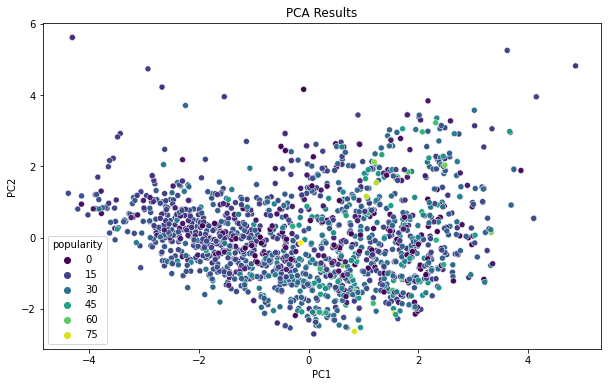

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness','liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Convert columns to numeric, handling errors
def convert_to_numeric(df1, columns):
    for col in columns:
        df1[col] = pd.to_numeric(df1[col], errors='coerce')
    return df1

# Clean the data
df1 = convert_to_numeric(df1, numerical_features)
df1.dropna(subset=numerical_features, inplace=True)

# Apply StandardScaler
scaler = StandardScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])



# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df1[numerical_features])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}')

# Adding principal components to the dataframe
df1['PC1'] = principal_components[:, 0]
df1['PC2'] = principal_components[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=df1, hue='popularity', palette='viridis')
plt.title('PCA Results')
plt.show()



In [30]:
df1.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,Year,Month,Day,Weekday,month_name,Week number,PC1,PC2
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,-0.739355,-0.041343,1.115764,3.012099,1.261552,-1.985045,0.784410,-0.276517,-2.387590,33,48640,2022,6,10,Friday,June,23,-1.397609,1.347826
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.820518,-1.007963,0.960062,0.249238,1.344648,0.724545,0.123753,0.183852,-1.142678,34,253173,2022,6,10,Friday,June,23,-1.960844,0.855373
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.728140,-0.584626,0.982305,0.853953,1.330321,0.680109,0.881280,0.136323,-1.164306,34,263160,2022,6,10,Friday,June,23,-2.080916,0.791622
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,1.392383,-0.704571,1.071278,-0.594080,1.155532,0.479980,2.392459,0.236514,-1.882359,32,305880,2022,6,10,Friday,June,23,-2.641657,2.047406
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.657756,-1.170242,0.982305,-0.392050,1.358975,0.625984,0.455050,0.152303,-1.627147,32,305106,2022,6,10,Friday,June,23,-2.264998,1.296116


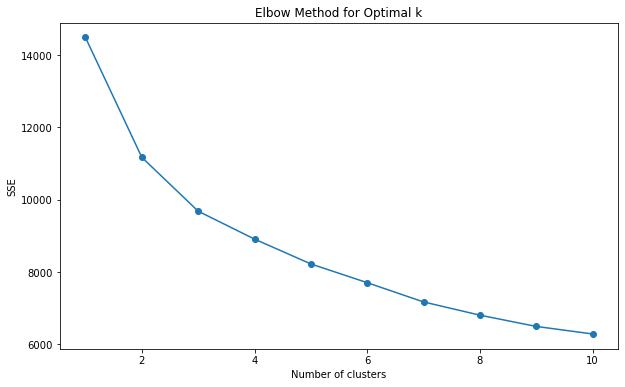

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1[numerical_features])
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

In [46]:
df1['cluster'] = kmeans.fit_predict(df1[numerical_features])

In [47]:
# Aggregate by cluster and calculate the mean of numeric features
cluster_summary = df1.groupby('cluster')[numerical_features].mean()

# Display cluster summary
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
cluster,,,,,,,,,
0,-0.286420,0.673102,0.166268,0.213383,-0.539557,0.138859,-0.407685,-0.139979,0.893118
1,0.785661,0.155336,-1.230000,-0.259756,-0.577702,-0.916216,-0.437372,-0.367056,-0.402530
2,-0.293367,-0.765732,0.732916,-0.018115,0.943260,0.531387,0.713349,0.402597,-0.573563


In [48]:
# Get the most common album for each cluster
most_common_album = df1.groupby('cluster')['album'].agg(lambda x: x.mode()[0])

# Combine numeric summary with the most common album
cluster_summary['most_common_album'] = most_common_album

# Display combined cluster summary
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,most_common_album
cluster,,,,,,,,,,
0,-0.286420,0.673102,0.166268,0.213383,-0.539557,0.138859,-0.407685,-0.139979,0.893118,Honk (Deluxe)
1,0.785661,0.155336,-1.230000,-0.259756,-0.577702,-0.916216,-0.437372,-0.367056,-0.402530,Aftermath (UK Version)
2,-0.293367,-0.765732,0.732916,-0.018115,0.943260,0.531387,0.713349,0.402597,-0.573563,Voodoo Lounge Uncut (Live)
